### Лабораторная работа №1 (вариант 10)

# Построение датчиков БСВ

### 1. Мультипликативно-конгруентный датчик

In [1]:
a = 16807
b = 16807
m = 2**31

In [2]:
class Generator1:
    def __init__(self, a, b, m):
        self.base = a
        self.a = a
        self.b = b
        self.m = m
        
    def rand(self):
        self.a = (self.a * self.b) % self.m
        return self.a / self.m
    
    def reset(self):
        self.a = self.base
        return self
    
    def get_period(self):
        period = 0
        while(period <= self.m):
            self.rand()
            period += 1
            if(self.a == self.base):
                return(period)
        return -1

In [3]:
list1 = []
gen1 = Generator1(a, b, m)

for i in range(0, 1000):
    list1.append(gen1.rand())
    if(i < 10):
        print(list1[i])

0.1315377880819142
0.7556042927317321
0.44134794222190976
0.7348649236373603
0.8747715731151402
0.2858293461613357
0.9338209335692227
0.7284304979257286
0.7313786377198994
0.2807641583494842


In [4]:
# Определим период построенного датчика

#print("T = " + str(gen1.get_period()))

# T = 268434456 

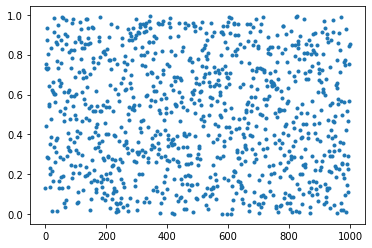

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(0, 1000)], list1, '.')

### 2. Датчик на основе нелинейных реккурентных формул

In [6]:
a = 16807
b = 16807
c = 37
g = 10
m = 2**31

In [7]:
# Период такого датчика будет равен M=2^31

In [8]:
class Generator2:
    def __init__(self, a, b, c, g, m):
        self.base = a
        self.a = a
        self.b = b
        self.c = c
        self.g = g
        self.m = m
        
    def reset(self):
        self.a = self.base
        return self
        
    def rand(self):
        self.a = (g * self.a * self.a + self.a * self.b + self.c) % self.m
        return self.a / self.m

In [9]:
list2 = []
gen2 = Generator2(a, b, c, g, m)

for i in range(0, 1000):
    list2.append(gen2.rand())
    if(i < 10):
        print(list2[i])

0.4469156861305237
0.060548263136297464
0.4807263920083642
0.27407721942290664
0.45434522442519665
0.8374517154879868
0.06728929933160543
0.0897158901207149
0.3819110207259655
0.37396890530362725


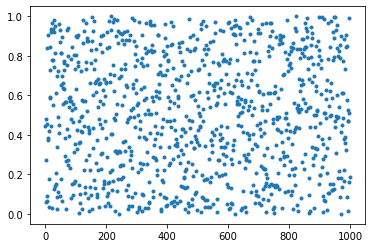

In [23]:
plt.plot([i for i in range(0, 1000)], list2, '.')

### 3. Датчик Маклорена-Марсальи (на основе двух предыдущих)

In [10]:
import math

In [11]:
k = 64

In [12]:
class Generator3:
    def __init__(self, k, gen1, gen2):
        self.k = k
        self.gen1 = gen1
        self.gen2 = gen2
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
            
    def reset(self):
        self.gen1.reset()
        self.gen2.reset()
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
        return self
        
    def rand(self):
        index = math.floor(self.gen2.rand() * self.k)
        value = self.v[index]
        self.v[index] = self.gen1.rand()
        return value

In [13]:
list3 = []
gen3 = Generator3(k, gen1.reset(), gen2.reset())

for i in range(0, 1000):
    list3.append(gen3.rand())
    if(i < 10):
        print(list3[i])

0.914796479512006
0.7348649236373603
0.33447730587795377
0.34988268790766597
0.984431158285588
0.18687627790495753
0.8747715731151402
0.2858293461613357
0.6633048285730183
0.6216257098130882


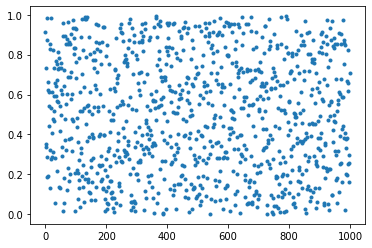

In [24]:
plt.plot([i for i in range(0, 1000)], list3, '.')

# Проверка построенных датчиков

### Реализация критерия хи-квадрат Пирсона

In [14]:
def frec(val_obs, n):
    f_obs = []
    for i in range(0, n):
        f_obs.append(0)
    
    # calculate observed frequences
    i = 0
    val_sorted = sorted(val_obs)
    for val in val_sorted:
        if(val < (i+1)/n and val >= i/n):
            f_obs[i] += 1
        else:
            i += 1
            f_obs[i] += 1
        
    return f_obs

In [15]:
def chisquare(val_obs, n):
    f_exp = len(val_obs)/n
    f_obs = frec(val_obs, n)
          
    # calculate chisquare
    chisquare = 0.0
    for i in range(0, n):
        chisquare += ((f_obs[i] - f_exp)**2 / f_exp)
        
    return chisquare

In [16]:
# Compare with scipy chisquare

from scipy.stats import chisquare as chi

print("Custom chisqare = " + str(chisquare(list2, 13)))
print(" Scipy chisqare = " + str(chi(frec(list2, 13)).statistic))

Custom chisqare = 11.504000000000001
 Scipy chisqare = 11.504000000000001


### Проверка по критерию хи-квадрат Пирсона

In [17]:
# Для 5 степеней свободы

treshhold_value = 11.071

print("Treshhold -> " + format(treshhold_value, '.3f'))
print("---------------------------")
print("gen1 -> " + format(chisquare(list1, 6), '.3f'))
print("gen2 -> " + format(chisquare(list2, 6), '.3f'))
print("gen3 -> " + format(chisquare(list3, 6), '.3f'))

Treshhold -> 11.071
---------------------------
gen1 -> 2.444
gen2 -> 8.540
gen3 -> 3.092


In [18]:
# Для 15 степеней свободы

treshhold_value = 26.296

print("Treshhold -> " + format(treshhold_value, '.3f'))
print("---------------------------")
print("gen1 -> " + format(chisquare(list1, 16), '.3f'))
print("gen2 -> " + format(chisquare(list2, 16), '.3f'))
print("gen3 -> " + format(chisquare(list3, 16), '.3f'))

Treshhold -> 26.296
---------------------------
gen1 -> 8.736
gen2 -> 16.352
gen3 -> 9.280


### Реализация критерия согласия Колмогорова

In [19]:
import numpy

def kolm(val_obs):
    val_sorted = sorted(val_obs)
    sup_d = 0
    for i in range(1, len(val_sorted)):
        f1 = i
        f2 = (i + 1)
        f3 = val_sorted[i] * len(val_sorted)
        d = max(abs(f1 - f3), abs(f2 - f3))
        if(d > sup_d):
            sup_d = d
            
    return sup_d / len(val_sorted)

In [20]:
#critical value of D for n elements

def crit(n):
    return 1.22 / numpy.sqrt(n)

### Проверка по критерию Колмогорова

In [21]:
treshhold_value = crit(1000)

print("Treshhold -> " + format(treshhold_value, '.4f'))
print("---------------------------")
print("gen1 -> " + format(kolm(list1), '.4f'))
print("gen2 -> " + format(kolm(list2), '.4f'))
print("gen3 -> " + format(kolm(list3), '.4f'))

Treshhold -> 0.0386
---------------------------
gen1 -> 0.0257
gen2 -> 0.0200
gen3 -> 0.0247
